In [3]:
from src.data.dataset import MedicalSegmentationDataset, get_data_loaders
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [13]:
# First, let's check where we are
%cd ..
!cd


c:\Users\Yanis\Documents\code\ovocyte_segmentation


c:\Users\Yanis\Documents\code\ovocyte_segmentation\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\Yanis\Documents\code\ovocyte_segmentation


In [14]:
#load config from configs/config.yaml
import yaml

with open('configs/config.yaml') as file:
    config = yaml.safe_load(file)
    


In [19]:
#get the data loaders

train_loader, val_loader,test_loader = get_data_loaders(
    data_dir = 'data/raw',
    config=config,
    transform=None,
)

print("Train loader length: ", len(train_loader))   
print("Val loader length: ", len(val_loader))
print("Test loader length: ", len(test_loader))

Train loader length:  2
Val loader length:  1
Test loader length:  1


In [ ]:
#show the first batch of the train loader
for i, batch in enumerate(train_loader):
    if i == 0:
        print("Batch shape: ", batch['image'].shape)
        print("Batch keys: ", batch.keys())
#batch has shape Batch shape:  torch.Size([32, 3, 416, 416])


Batch shape:  torch.Size([32, 3, 416, 416])
Batch keys:  dict_keys(['image', 'mask'])


Max value:  0.6862745
Min value:  0.25882354


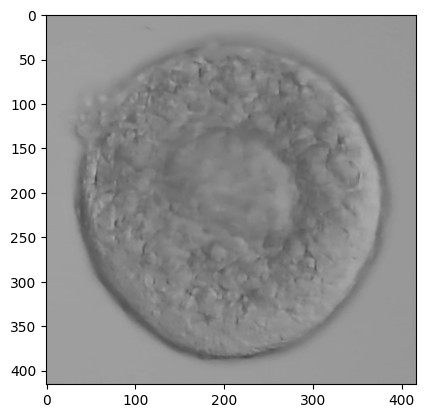

In [24]:
#plot the first image in the batch
import matplotlib.pyplot as plt
import numpy as np

image=next(iter(train_loader))['image'][0] #pytorch tensor image

#convert to numpy
image=image.numpy().transpose(1,2,0)/255
#print max and min values
print("Max value: ", image.max())
print("Min value: ", image.min())

plt.imshow(image)